# Introduction to Machine-Learning Practical 
In this practical, I will try to show you how to create a machine-learning model to predict the diabetes risk of a person.  
We will perform data exploration, data processing, model training and evaluation and finally, fine-tuning.  
At different parts of this practical, I will add screenshots of the lecture that I did at the beginning of the year to remind you of the concepts.  

### Context
We will use the Diabetes dataset, a survey of more than 70,000 american people with 17 measurements per person and if they have diabetes or not. For the sake of this practical, I reduced the dataset to ~5,500 people.  
**Today we will try to build a machine-learning model that can predict if a person will likely develop diabetes or not.**  
If you want more details on the data you can find  them [here](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)  

<details><summary>We will use a total of 17 measurements to predict the diabetes risk. Click here to open the meaning of each column of the file</summary>
<p>
 <ul>
  <li><strong>Age:</strong> age of the person [18-95]</li>
  <li><strong>Sex:</strong> sex of the person [male, female]</li>
  <li><strong>High Chol:</strong> high level of cholesterol [yes, no]</li>
  <li><strong>CholCheck:</strong> cholesterol check in last 5 years [yes, no]</li>
  <li><strong>BMI:</strong> body mass index [15-100]</li>
  <li><strong>Smoker:</strong> does the person smoke ? [0-1]</li>
  <li><strong>HeartDiseaseorAttack:</strong> had heart issues [0-1]</li>
  <li><strong>PhysActivity:</strong> physical activity past 30 days [0-1]</li>
  <li><strong>Fruits:</strong> eat fruit every days [0-1]</li>
  <li><strong>Veggies:</strong> eat veggies every days [0-1]</li>
  <li><strong>HvyAlcoholConsump:</strong> heavy alcohol drinker [0-1]</li>
  <li><strong>GenHlth:</strong> self-assessed general health level [excellent, very good, good, fair, poor]</li>
  <li><strong>MentHlth:</strong> days of poor mental health during last month [0-30]</li>
  <li><strong>PhysHlth:</strong> days of physical illness last 30 days [0-30]</li>
  <li><strong>DiffWalk:</strong> difficulty walking or climbing stairs [0-1]</li>
  <li><strong>Stroke:</strong> already had a stroke: [0-1]</li>
  <li><strong>HighBP:</strong> high blood pressure [0-1]</li>
</ul> 
</p>
</details>


In [38]:
# With this command, you can download the data we will use on the server. Simply run the cell.
!wget https://raw.githubusercontent.com/Dichopsis/ML-TP-ESBS/main/diabetes_data_TP.csv
import warnings
warnings.filterwarnings('ignore')

--2023-02-15 15:45:09--  https://raw.githubusercontent.com/Dichopsis/ML-TP-ESBS/main/diabetes_data_TP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443937 (434K) [text/plain]
Saving to: ‘diabetes_data_TP.csv.2’

diabetes_data_TP.cs 100%[===================>] 433.53K  --.-KB/s    in 0.04s   

2023-02-15 15:45:09 (10.2 MB/s) - ‘diabetes_data_TP.csv.2’ saved [443937/443937]



# A tip before starting
The most useful tip I can give you for this practical but also for code in general is that **everytime you are lost on how to use a function or what function to use, simply google "library_of_the_function name_of_the_function" and click this first result**. You will almost always have an example on how to use the function and all the parameters needed.  
For example: 
* "scikit train_test_split" -> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Part 1 - Data Exploration
### Tasks: explore the data
* import the data
* count the number of persons and visualize the 5 first line
* see diabetes vs non-diabetes person ratio
* plot a box-plot of the BMI and a histogram of the smokers
### Questions
1. How many persons are in this dataset ? (rows). How many features/measurements ? (columns)
2. What is the percentage of persons with diabetes ?
3. What is the median BMI of the persons in the dataset ? (approximately with BoxPlot)
4. Is there more non-smoker or smokers in the dataset ? (Histogram)  

![image](https://i.imgur.com/xLoQ27w.png)

In [39]:
# Pandas is the main library for data manipulation in Python
import pandas as pd
# Matplotlib is the main library for data visualization in Python
import matplotlib.pyplot as plt

# Import the data (df variable) using pd.read_csv()
df = pd.read_csv("diabetes_data_TP.csv")

print("=== QUESTION 1 ===")
# Print the shape of the dataframe and the head using df.shape and df.head()
print(df.shape)
df.head()

=== QUESTION 1 ===
(5631, 18)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,72.0,female,Yes,Yes,40.0,1.0,1.0,0.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,1.0,1.0
1,13.0,female,Yes,Yes,32.0,0.0,0.0,1.0,1.0,1.0,0.0,fair,0.0,5.0,0.0,0.0,1.0,1.0
2,67.0,female,No,Yes,20.0,1.0,0.0,0.0,1.0,1.0,0.0,very good,0.0,0.0,0.0,0.0,1.0,1.0
3,78.0,female,Yes,Yes,28.0,0.0,1.0,0.0,1.0,1.0,0.0,fair,0.0,0.0,1.0,0.0,1.0,1.0
4,56.0,female,Yes,Yes,28.0,0.0,0.0,1.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
print("=== QUESTION 2 ===")
# Use value_counts() on the "stroke" column. To select a column, use df["column_name"]
# Tip: set the "normalize" parameter to True in the value_count() function !
print(df["Diabetes"].value_counts(normalize=True))

=== QUESTION 2 ===
0.0    0.917421
1.0    0.082579
Name: Diabetes, dtype: float64


=== QUESTION 3 ===


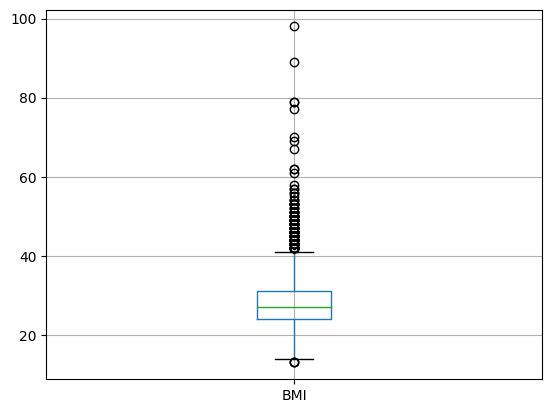

In [41]:
print("=== QUESTION 3 ===")
# Make a boxplot of the "BMI" column using the boxplot() function on the dataframe with the parameter "column"="column_name"
boxplot = df.boxplot(column="BMI")
# We use plt.show() to display the boxplot
plt.show(boxplot)

=== QUESTION 4 ===


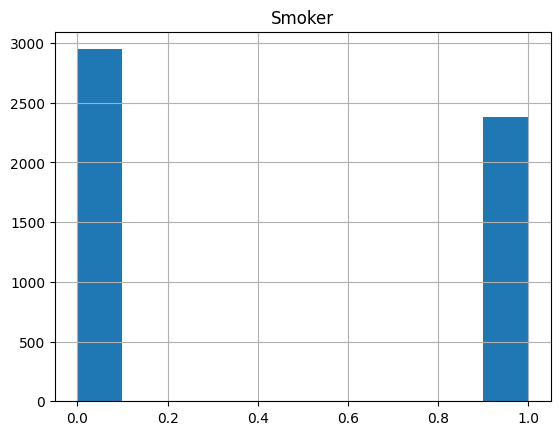

In [42]:
print("=== QUESTION 4 ===")
# Make a histogram of the "Smoker" column using the hist() function on the dataframe with the parameter "column"="column_name"
hist = df.hist(column="Smoker")
# We use plt.show() to display the histogram
plt.show(hist)

# Part 2 - Data Processing and splitting
### Tasks: encode the data to be usable for training by a ML algorithm
* analyze what columns we need to process and modify them to do machine-learning !
* split our dataset between a training dataset and a test dataset

### Questions
1. What columns are categorical data, what columns are numeric.
2. What columns are already ready to be used and need no change?
3. What type of processing do you need to do on categorical data and why
4. What type of processing do you need to do on numeric data and why
5. What columns contains missing data ? What type of processing do you need to do in this case.

![image](https://i.imgur.com/HbEoLeR.png)


In [43]:
print("=== QUESTION 1 to 4 ===")
# You should be able to answer questions 1 to 4 simply with the table below (df.head())
df.head()

=== QUESTION 1 to 4 ===


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,72.0,female,Yes,Yes,40.0,1.0,1.0,0.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,1.0,1.0
1,13.0,female,Yes,Yes,32.0,0.0,0.0,1.0,1.0,1.0,0.0,fair,0.0,5.0,0.0,0.0,1.0,1.0
2,67.0,female,No,Yes,20.0,1.0,0.0,0.0,1.0,1.0,0.0,very good,0.0,0.0,0.0,0.0,1.0,1.0
3,78.0,female,Yes,Yes,28.0,0.0,1.0,0.0,1.0,1.0,0.0,fair,0.0,0.0,1.0,0.0,1.0,1.0
4,56.0,female,Yes,Yes,28.0,0.0,0.0,1.0,1.0,1.0,0.0,good,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
print("=== QUESTION 5 ===")
# You should be able to answer the question 5 simply with the table below (df.info())
# (remember how many rows there are in the dataframe)
df.info()

=== QUESTION 5 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5631 non-null   float64
 1   Sex                   5631 non-null   object 
 2   HighChol              5631 non-null   object 
 3   CholCheck             5631 non-null   object 
 4   BMI                   5233 non-null   float64
 5   Smoker                5328 non-null   float64
 6   HeartDiseaseorAttack  5631 non-null   float64
 7   PhysActivity          5631 non-null   float64
 8   Fruits                5631 non-null   float64
 9   Veggies               5631 non-null   float64
 10  HvyAlcoholConsump     5631 non-null   float64
 11  GenHlth               5631 non-null   object 
 12  MentHlth              5631 non-null   float64
 13  PhysHlth              5631 non-null   float64
 14  DiffWalk              5631 non-null   float64
 15  St

In [45]:
# We will now process theses columns to make them usable
# From Scikit learn we import the tools we will need
# OrdinalEncoder for the categorical variables
# StandardScaler for the numerical variables
# IterativeImputer for the missing values
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# NumPy is the main library for array manipulation in Python
import numpy as np

# Create lists with columns names for each processing categories
columns_nothing_to_do = ["Smoker","HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "DiffWalk", "Stroke", "HighBP", "Diabetes"] # 10 Columns
categorical_columns_to_process = ["Sex", "HighChol", "CholCheck", "GenHlth"] # 4 Columns
numerical_columns_to_process = ["Age", "BMI", "MentHlth", "PhysHlth"] # 4 Columns


# Categorical data to numeric: do one hot encoding ( OrdinalEncoder(), .fit_transform() )
# I give you the OrdinalEncoder example. Do something similar for the Scaling of numerics data !
X_cat = df[categorical_columns_to_process]
X_cat_enc = OrdinalEncoder().fit_transform(X_cat)

# Numeric data: do scaling (-1,+1) (StandardScaler() and .fit_transform())
X_num = df[numerical_columns_to_process]
X_num_scaled = StandardScaler().fit_transform(X_num)

# Nothing-To-Do Cols: just select the data corresponding with df[name_of_the_list] and store it into X_nothing_to_do
# Then convert X_nothing_to_do to numpy array with .to_numpy()
X_nothing_to_do = df[columns_nothing_to_do]
X_nothing_to_do = X_nothing_to_do.to_numpy()

# Combine the X_cat_enc, X_num_scaled, and X_nothing_to_do data into a single array (array_data)
# using np.concatenate((array1, array2, array3), parameters) ; TIP: Care for the axis parameter (axis=1)
array_data = np.concatenate((X_cat_enc, X_num_scaled, X_nothing_to_do), axis=1)

# Finally handle Missing Data: Use imputer to predict them ( IterativeImputer() and .fit_transform() on array_data just as before
array_data = IterativeImputer().fit_transform(array_data)

# You can recreate a DataFrame for pretty printing, but this is optional. I give you the code it's a bit ugly.
df_data = pd.DataFrame(data=array_data, columns=list(X_cat.columns) + list(X_num.columns) + list(df[columns_nothing_to_do].columns))
df_data.head()

,Sex,HighChol,CholCheck,GenHlth,Age,BMI,MentHlth,PhysHlth,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,DiffWalk,Stroke,HighBP,Diabetes
0,0.0,1.0,1.0,2.0,1.146139,1.902009,-0.426205,-0.470133,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,1.0,1.0,1.0,-2.179834,0.622491,-0.426205,0.124957,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,4.0,0.864277,-1.296787,-0.426205,-0.470133,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.484374,-0.017268,-0.426205,-0.470133,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.0,1.0,1.0,2.0,0.244180,-0.017268,-0.426205,-0.470133,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


### Tasks: Split our dataset between train and test set
* split our processed data into train and test dataset

### Questions
1. What train/test ratio should you use.
2. How many entries are in your train dataset and in your test dataset.
3. Verify that you have the same diabetes/diabetes ratio between train and test dataset.


In [46]:
from sklearn.model_selection import train_test_split
# From your numpy array that you created, separate the X columns (features: multiples columns) and the Y column (label: last column) in two variables
# Call them X and Y, X contains all the columns except the last one, Y contains only the last column from the array_data variable.
X = array_data[:,:-1]
Y = array_data[:,-1]

# Use train_test_split() using X and Y with the ratio you selected. The parameter test_size= is the ratio of the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=777)

# Print X_train and X_test shape, use np.unique() on Y_train and Y_test to get the diab vs no diab ratio
print(X_train.shape)
print(X_test.shape)
print(np.unique(Y_train, return_counts=True)[1])
print(np.unique(Y_test, return_counts=True)[1])

(4223, 17)
(1408, 17)
[3885  338]
[1281  127]
